In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib
from openpyxl import Workbook  
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xlrd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
print(tf.__version__)



2.0.0


In [4]:
emp1=pd.ExcelFile(r'C:\Users\LG\Desktop\Yungun\최소주파수\timevar_data.xlsx')

In [5]:
dataset=emp1.parse('Sheet1')
dataset

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia,Fre1,Fre2,Fre3,Fre4,...,Fre991,Fre992,Fre993,Fre994,Fre995,Fre996,Fre997,Fre998,Fre999,Fre1000
0,688,2111,498,3481,510,87639.242188,59.999995,59.999991,59.999990,59.999989,...,59.629497,59.626658,59.629440,59.629016,59.627422,59.630693,59.628388,59.628901,59.631182,59.628040
1,832,686,992,1397,386,89745.250000,59.999989,59.999987,59.999984,59.999986,...,59.548554,59.548789,59.548913,59.548976,59.548666,59.547984,59.547267,59.546751,59.546404,59.546362
2,201,501,639,3145,1314,88694.242188,60.000001,59.999996,59.999993,59.999988,...,59.586412,59.586410,59.586436,59.586309,59.586252,59.586268,59.586213,59.586153,59.586156,59.586194
3,267,1609,927,2385,1032,88694.242188,60.000002,59.999997,59.999995,59.999991,...,59.650299,59.652218,59.649385,59.652867,59.651675,59.651001,59.654250,59.651282,59.653545,59.654284
4,471,3038,83,1522,625,88694.242188,59.999998,59.999994,59.999991,59.999987,...,59.530007,59.529689,59.529515,59.529164,59.528930,59.528590,59.528234,59.527735,59.527293,59.526710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,113,1692,410,2307,201,89745.250000,60.000001,59.999998,59.999996,59.999992,...,59.623904,59.623151,59.626295,59.624356,59.623577,59.626668,59.624736,59.623771,59.626823,59.625050
429,344,313,456,3505,959,88694.242188,59.999995,59.999992,59.999991,59.999989,...,59.633369,59.632861,59.632207,59.634863,59.632057,59.635181,59.633614,59.634059,59.635965,59.633332
430,441,3182,488,1210,25,89745.250000,59.999999,59.999995,59.999993,59.999988,...,59.588079,59.588080,59.587882,59.587732,59.587502,59.587228,59.587116,59.586973,59.586978,59.587067
431,642,1977,303,4230,116,87639.242188,59.999996,59.999991,59.999987,59.999982,...,59.474678,59.474426,59.473969,59.473505,59.473123,59.472791,59.472380,59.471921,59.471515,59.471006


In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #80퍼센트 정보를 랜덤하게 가져옴
test_dataset = dataset.drop(train_dataset.index)

In [7]:
train_stats = train_dataset.describe()
for i in range(1,1001):
    train_stats.pop("Fre%d"%i)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Metro,346.0,436.979769,261.230194,0.00000,203.000000,432.50000,660.25,906.00000
Yungnam,346.0,1615.760116,989.464389,18.00000,765.000000,1461.50000,2389.75,3557.00000
Chungnam,346.0,486.916185,290.362904,0.00000,241.250000,480.00000,738.75,998.00000
Honam,346.0,2181.921965,1152.694578,22.00000,1212.500000,2172.50000,3142.25,4321.00000
Gangwon,346.0,685.566474,414.748078,1.00000,333.250000,666.00000,1031.75,1399.00000
Inertia,346.0,89185.125249,1539.126843,84488.24219,88694.242188,88694.24219,89745.25,93832.26563


In [8]:
train_dataset

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia,Fre1,Fre2,Fre3,Fre4,...,Fre991,Fre992,Fre993,Fre994,Fre995,Fre996,Fre997,Fre998,Fre999,Fre1000
366,357,617,4,1320,1311,91266.250000,60.000004,60.000000,59.999998,59.999993,...,59.692248,59.692762,59.693554,59.694098,59.694056,59.693859,59.694171,59.694884,59.695648,59.695870
113,525,575,814,2077,335,89745.250000,59.999991,59.999989,59.999985,59.999985,...,59.531542,59.531095,59.530834,59.530637,59.530663,59.530612,59.530526,59.530166,59.529626,59.528905
425,661,2919,866,2227,9,87639.242188,59.999994,59.999994,59.999993,59.999996,...,59.756043,59.755267,59.754463,59.753850,59.753635,59.753705,59.753995,59.754018,59.753654,59.752954
320,634,1278,279,1683,1309,89745.250000,59.999996,59.999990,59.999986,59.999980,...,59.461151,59.460554,59.460057,59.459921,59.459611,59.459354,59.458927,59.458407,59.457680,59.456839
10,496,1265,625,2370,553,89745.250000,59.999997,59.999994,59.999993,59.999993,...,59.703328,59.702341,59.704010,59.704084,59.702616,59.704200,59.704676,59.703109,59.704526,59.705311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,144,1467,589,701,774,91266.250000,60.000003,60.000000,59.999998,59.999993,...,59.691369,59.689850,59.689815,59.691836,59.691456,59.690184,59.691748,59.692948,59.691479,59.691647
341,330,3280,365,1391,1036,88694.242190,59.999998,59.999993,59.999989,59.999984,...,59.512221,59.511905,59.511513,59.511160,59.510792,59.510456,59.510011,59.509569,59.509090,59.508659
207,191,2134,508,3437,438,87639.242190,59.999999,59.999994,59.999990,59.999985,...,59.505871,59.505474,59.505073,59.504754,59.504332,59.503917,59.503480,59.503041,59.502742,59.502403
279,324,1959,776,673,865,89745.250000,59.999996,59.999993,59.999990,59.999987,...,59.568806,59.568787,59.568738,59.568657,59.568564,59.568400,59.568266,59.568085,59.567900,59.567707


In [9]:
a = train_dataset.copy()
b = test_dataset.copy()



In [10]:
a.pop('Metro') 
a.pop('Yungnam')
a.pop('Chungnam')
a.pop('Honam')
a.pop('Gangwon')
a.pop('Inertia')
a

,Fre1,Fre2,Fre3,Fre4,Fre5,Fre6,Fre7,Fre8,Fre9,Fre10,...,Fre991,Fre992,Fre993,Fre994,Fre995,Fre996,Fre997,Fre998,Fre999,Fre1000
366,60.000004,60.000000,59.999998,59.999993,59.999994,59.999993,59.999994,59.999992,59.999990,59.999988,...,59.692248,59.692762,59.693554,59.694098,59.694056,59.693859,59.694171,59.694884,59.695648,59.695870
113,59.999991,59.999989,59.999985,59.999985,59.999981,59.999978,59.999973,59.999968,59.999962,59.999958,...,59.531542,59.531095,59.530834,59.530637,59.530663,59.530612,59.530526,59.530166,59.529626,59.528905
425,59.999994,59.999994,59.999993,59.999996,59.999995,59.999996,59.999993,59.999993,59.999992,59.999991,...,59.756043,59.755267,59.754463,59.753850,59.753635,59.753705,59.753995,59.754018,59.753654,59.752954
320,59.999996,59.999990,59.999986,59.999980,59.999976,59.999972,59.999968,59.999962,59.999956,59.999949,...,59.461151,59.460554,59.460057,59.459921,59.459611,59.459354,59.458927,59.458407,59.457680,59.456839
10,59.999997,59.999994,59.999993,59.999993,59.999992,59.999993,59.999991,59.999990,59.999988,59.999987,...,59.703328,59.702341,59.704010,59.704084,59.702616,59.704200,59.704676,59.703109,59.704526,59.705311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,60.000003,60.000000,59.999998,59.999993,59.999994,59.999994,59.999993,59.999992,59.999989,59.999988,...,59.691369,59.689850,59.689815,59.691836,59.691456,59.690184,59.691748,59.692948,59.691479,59.691647
341,59.999998,59.999993,59.999989,59.999984,59.999982,59.999979,59.999976,59.999972,59.999967,59.999961,...,59.512221,59.511905,59.511513,59.511160,59.510792,59.510456,59.510011,59.509569,59.509090,59.508659
207,59.999999,59.999994,59.999990,59.999985,59.999983,59.999979,59.999977,59.999973,59.999968,59.999963,...,59.505871,59.505474,59.505073,59.504754,59.504332,59.503917,59.503480,59.503041,59.502742,59.502403
279,59.999996,59.999993,59.999990,59.999987,59.999986,59.999984,59.999981,59.999978,59.999974,59.999970,...,59.568806,59.568787,59.568738,59.568657,59.568564,59.568400,59.568266,59.568085,59.567900,59.567707


In [11]:
b.pop('Metro') 
b.pop('Yungnam')
b.pop('Chungnam')
b.pop('Honam')
b.pop('Gangwon')
b.pop('Inertia')
b

,Fre1,Fre2,Fre3,Fre4,Fre5,Fre6,Fre7,Fre8,Fre9,Fre10,...,Fre991,Fre992,Fre993,Fre994,Fre995,Fre996,Fre997,Fre998,Fre999,Fre1000
9,59.999995,59.999993,59.999992,59.999989,59.999989,59.999987,59.999987,59.999986,59.999983,59.999979,...,59.616151,59.615979,59.617462,59.617820,59.616700,59.616730,59.618155,59.618160,59.617095,59.617308
25,59.999998,59.999994,59.999992,59.999988,59.999988,59.999986,59.999985,59.999982,59.999979,59.999974,...,59.586020,59.586027,59.585922,59.585717,59.585423,59.585233,59.585037,59.585065,59.585044,59.585049
28,59.999998,59.999994,59.999990,59.999985,59.999983,59.999981,59.999979,59.999974,59.999970,59.999965,...,59.530118,59.529850,59.529579,59.529292,59.529039,59.528760,59.528463,59.528153,59.527808,59.527450
31,59.999998,59.999994,59.999991,59.999986,59.999985,59.999983,59.999981,59.999978,59.999974,59.999970,...,59.564303,59.564270,59.564191,59.564075,59.563958,59.563798,59.563552,59.563378,59.563181,59.563054
32,59.999984,59.999985,59.999985,59.999985,59.999982,59.999978,59.999976,59.999974,59.999970,59.999965,...,59.561452,59.561202,59.560959,59.560550,59.560276,59.559941,59.559673,59.559470,59.559285,59.559065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,60.000000,59.999994,59.999991,59.999985,59.999984,59.999983,59.999981,59.999977,59.999973,59.999968,...,59.612875,59.613521,59.614158,59.614724,59.614984,59.615013,59.614834,59.614562,59.614381,59.614398
404,59.999993,59.999988,59.999984,59.999980,59.999976,59.999972,59.999967,59.999962,59.999955,59.999949,...,59.483911,59.482990,59.481968,59.481499,59.481462,59.481511,59.481314,59.480489,59.479453,59.478806
417,59.999998,59.999993,59.999990,59.999985,59.999983,59.999981,59.999978,59.999975,59.999970,59.999965,...,59.529318,59.529025,59.528731,59.528439,59.528161,59.527859,59.527531,59.527177,59.526816,59.526444
419,60.000004,60.000001,59.999999,59.999995,59.999995,59.999995,59.999996,59.999994,59.999992,59.999990,...,59.716444,59.713609,59.713787,59.716770,59.713260,59.714996,59.716760,59.713325,59.716435,59.716593


In [12]:
c = train_dataset.copy()
d = test_dataset.copy()

In [13]:
for i in range(1,1001):
    c.pop('Fre%d'%i)
c

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia
366,357,617,4,1320,1311,91266.250000
113,525,575,814,2077,335,89745.250000
425,661,2919,866,2227,9,87639.242188
320,634,1278,279,1683,1309,89745.250000
10,496,1265,625,2370,553,89745.250000
...,...,...,...,...,...,...
48,144,1467,589,701,774,91266.250000
341,330,3280,365,1391,1036,88694.242190
207,191,2134,508,3437,438,87639.242190
279,324,1959,776,673,865,89745.250000


In [15]:
for i in range(1,1001):
    d.pop('Fre%d'%i)
d

KeyError: 'Fre1'

In [16]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']     #std =standard deviation 표준편차 
normed_train_data = norm(c)
normed_test_data = norm(d)

In [17]:
normed_train_data 

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia
366,-0.306166,-1.009395,-1.663147,-0.747745,1.507984,1.352146
113,0.336945,-1.051842,1.126466,-0.091023,-0.845252,0.363924
425,0.857559,1.317117,1.305552,0.039107,-1.631271,-1.004390
320,0.754202,-0.341357,-0.716056,-0.432831,1.503162,0.363924
10,0.225932,-0.354495,0.475556,0.163164,-0.319631,0.363924
...,...,...,...,...,...,...
48,-1.121539,-0.150344,0.351573,-1.284748,0.213222,1.352146
341,-0.409523,1.681960,-0.419875,-0.686151,0.844931,-0.318936
207,-0.941621,0.523758,0.072612,1.088821,-0.596908,-1.004390
279,-0.432491,0.346895,0.995595,-1.309039,0.432633,0.363924


In [19]:
train_outs = a.describe()
train_outs = train_outs.transpose()
train_outs


,count,mean,std,min,25%,50%,75%,max
Fre1,346.0,60.000230,0.004290,59.999768,59.999995,59.999999,60.000001,60.079800
Fre2,346.0,59.999793,0.003748,59.930275,59.999991,59.999995,59.999997,60.000161
Fre3,346.0,59.999697,0.005480,59.898053,59.999989,59.999992,59.999995,60.000183
Fre4,346.0,59.999759,0.004266,59.920631,59.999985,59.999989,59.999992,60.000185
Fre5,346.0,59.999754,0.004368,59.918741,59.999984,59.999988,59.999992,60.000206
...,...,...,...,...,...,...,...,...
Fre996,346.0,59.595508,0.089972,59.021101,59.539525,59.593268,59.654444,59.765440
Fre997,346.0,59.595341,0.090223,59.017940,59.539033,59.593272,59.655025,59.763919
Fre998,346.0,59.595327,0.090594,59.013120,59.538599,59.593340,59.654642,59.764122
Fre999,346.0,59.595231,0.090639,59.018581,59.538083,59.593494,59.655289,59.765026


In [20]:
def norm2(x):
    return (x - train_outs['mean']) / train_outs['std']     #std =standard deviation 표준편차 
normed_train_outs = norm2(a)
normed_test_outs = norm(b)

In [21]:
def build_model():
    model = keras.Sequential([
        layers.Dense(30, activation='relu', input_shape=[len(c.keys())]),
       
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000)
        ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse','accuracy',])
    return model

In [22]:
model = build_model()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_3 (Dense)              (None, 5000)              5005000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              5

In [24]:
example_batch = normed_train_data[:10]
example_batch

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia
366,-0.306166,-1.009395,-1.663147,-0.747745,1.507984,1.352146
113,0.336945,-1.051842,1.126466,-0.091023,-0.845252,0.363924
425,0.857559,1.317117,1.305552,0.039107,-1.631271,-1.004390
320,0.754202,-0.341357,-0.716056,-0.432831,1.503162,0.363924
10,0.225932,-0.354495,0.475556,0.163164,-0.319631,0.363924
199,1.121694,-0.534390,-0.722944,-0.815413,-1.556527,1.352146
150,-0.922481,-0.156408,0.344685,1.109642,-0.623430,-0.318936
391,-0.903340,-0.883064,-1.549496,-1.649112,0.025156,2.340379
102,-0.669830,1.534406,-1.456509,-1.851247,0.104723,0.363924
254,0.960916,0.759239,-0.705724,0.026094,-0.051999,-0.318936


In [25]:
example_result = model.predict(example_batch)         #predict method
example_result

array([[ 5.02131321e-02,  9.97367352e-02,  1.43612223e-03, ...,
         1.97381508e-02, -3.46837454e-02, -1.89782400e-02],
       [ 1.64244864e-02,  5.43427691e-02,  2.09646244e-02, ...,
        -1.58257112e-02,  1.52812735e-03, -2.14185193e-02],
       [ 2.99781803e-02,  9.07696411e-02,  8.33167061e-02, ...,
        -3.80573655e-03,  9.86672193e-03,  1.96365118e-02],
       ...,
       [ 4.48017679e-02,  1.74931988e-01,  1.63425866e-04, ...,
        -2.57650558e-02, -4.07086946e-02, -2.53473204e-02],
       [ 2.44222172e-02,  7.51860440e-02,  1.09119853e-02, ...,
        -5.19268028e-02,  6.36667665e-03,  4.57477421e-02],
       [ 1.72625519e-02,  9.03961733e-02,  2.81654987e-02, ...,
        -2.44924650e-02,  1.11937785e-04,  2.52258871e-02]], dtype=float32)

In [26]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 300
# validation_split 은 20퍼센트가 tsst가 된다
history = model.fit(
    normed_train_data, normed_train_outs,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [54]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
0,1.042964,0.722550,1.042964,0.000000,0.768993,0.652757,0.768993,0.000000,0
1,0.970340,0.686448,0.970340,0.003623,0.767536,0.644471,0.767536,0.000000,1
2,0.956734,0.664257,0.956734,0.003623,0.816609,0.681340,0.816609,0.000000,2
3,0.938277,0.672673,0.938277,0.007246,0.873249,0.694976,0.873249,0.000000,3
4,0.873740,0.654403,0.873740,0.007246,0.764518,0.653798,0.764518,0.000000,4
...,...,...,...,...,...,...,...,...,...
295,0.060319,0.159502,0.060319,0.057971,0.698593,0.624725,0.698593,0.000000,295
296,0.051119,0.144640,0.051119,0.054348,0.711467,0.618957,0.711467,0.014286,296
297,0.051686,0.143214,0.051686,0.057971,0.661197,0.621578,0.661197,0.014286,297
298,0.077235,0.173073,0.077235,0.068841,0.643802,0.605900,0.643802,0.000000,298


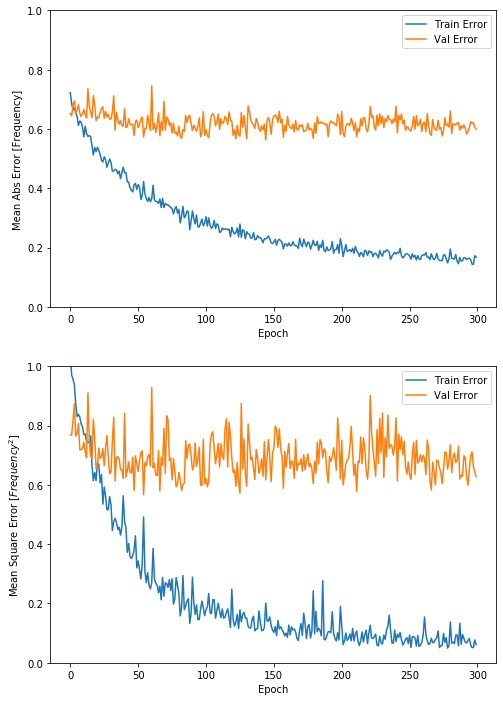

In [52]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Frequency]')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Frequency^2$]')
    
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

plot_history(history)

In [63]:
test_predictions = model.predict(normed_test_data).flatten()


In [74]:
def re(x):
    return (x * train_outs['std']) + train_outs['mean']     #std =standard deviation 표준편차 
for i in range (87):
    test_predictions + i = re(test_predictions[(i-1)*1000:(i)*1000])
    

SyntaxError: can't assign to operator (<ipython-input-74-69c32d20b914>, line 4)

In [66]:
test_predictions1, test_predictions2

(Fre1       60.000025
 Fre2       59.999989
 Fre3       59.999993
 Fre4       59.999977
 Fre5       59.999971
              ...    
 Fre996     59.697580
 Fre997     59.698083
 Fre998     59.697784
 Fre999     59.697332
 Fre1000    59.699622
 Length: 1000, dtype: float64,
 Fre1       59.999924
 Fre2       60.000046
 Fre3       60.000075
 Fre4       60.000040
 Fre5       60.000059
              ...    
 Fre996     59.612980
 Fre997     59.612730
 Fre998     59.612276
 Fre999     59.612456
 Fre1000    59.612762
 Length: 1000, dtype: float64)

In [40]:
x = []
for i in range (1000):
    x.append(0.01*i)
    
print(type(x))    


<class 'list'>


In [46]:
a = a.transpose()

In [47]:
p = a.copy()
p

,Fre1,Fre2,Fre3,Fre4,Fre5,Fre6,Fre7,Fre8,Fre9,Fre10,...,Fre991,Fre992,Fre993,Fre994,Fre995,Fre996,Fre997,Fre998,Fre999,Fre1000
366,60.000004,60.000000,59.999998,59.999993,59.999994,59.999993,59.999994,59.999992,59.999990,59.999988,...,59.692248,59.692762,59.693554,59.694098,59.694056,59.693859,59.694171,59.694884,59.695648,59.695870
113,59.999991,59.999989,59.999985,59.999985,59.999981,59.999978,59.999973,59.999968,59.999962,59.999958,...,59.531542,59.531095,59.530834,59.530637,59.530663,59.530612,59.530526,59.530166,59.529626,59.528905
425,59.999994,59.999994,59.999993,59.999996,59.999995,59.999996,59.999993,59.999993,59.999992,59.999991,...,59.756043,59.755267,59.754463,59.753850,59.753635,59.753705,59.753995,59.754018,59.753654,59.752954
320,59.999996,59.999990,59.999986,59.999980,59.999976,59.999972,59.999968,59.999962,59.999956,59.999949,...,59.461151,59.460554,59.460057,59.459921,59.459611,59.459354,59.458927,59.458407,59.457680,59.456839
10,59.999997,59.999994,59.999993,59.999993,59.999992,59.999993,59.999991,59.999990,59.999988,59.999987,...,59.703328,59.702341,59.704010,59.704084,59.702616,59.704200,59.704676,59.703109,59.704526,59.705311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,60.000003,60.000000,59.999998,59.999993,59.999994,59.999994,59.999993,59.999992,59.999989,59.999988,...,59.691369,59.689850,59.689815,59.691836,59.691456,59.690184,59.691748,59.692948,59.691479,59.691647
341,59.999998,59.999993,59.999989,59.999984,59.999982,59.999979,59.999976,59.999972,59.999967,59.999961,...,59.512221,59.511905,59.511513,59.511160,59.510792,59.510456,59.510011,59.509569,59.509090,59.508659
207,59.999999,59.999994,59.999990,59.999985,59.999983,59.999979,59.999977,59.999973,59.999968,59.999963,...,59.505871,59.505474,59.505073,59.504754,59.504332,59.503917,59.503480,59.503041,59.502742,59.502403
279,59.999996,59.999993,59.999990,59.999987,59.999986,59.999984,59.999981,59.999978,59.999974,59.999970,...,59.568806,59.568787,59.568738,59.568657,59.568564,59.568400,59.568266,59.568085,59.567900,59.567707


In [57]:
q = p[1:2]
q = q.transpose()


In [58]:
q

,113
Fre1,59.999991
Fre2,59.999989
Fre3,59.999985
Fre4,59.999985
Fre5,59.999981
...,...
Fre996,59.530612
Fre997,59.530526
Fre998,59.530166
Fre999,59.529626


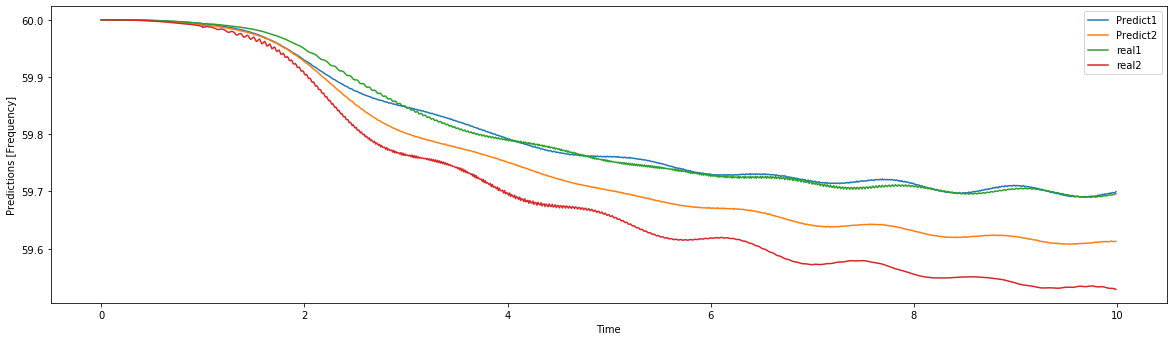

In [71]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.plot(x,test_predictions1,label = 'Predict1')
plt.plot(x,test_predictions2,label = 'Predict2')

plt.plot(x,p[0:1].transpose(), label = 'real1')
plt.plot(x,p[1:2].transpose(), label = 'real2')
plt.xlabel('Time')
plt.ylabel('Predictions [Frequency]')
plt.legend()
plt.show()

In [51]:
print(test_predictions.shape)

(1000,)


Fre1      NaN
Fre2      NaN
Fre3      NaN
Fre4      NaN
Fre5      NaN
           ..
Fre996    NaN
Fre997    NaN
Fre998    NaN
Fre999    NaN
Fre1000   NaN
Length: 1000, dtype: float64